## Logistic Regression

Logistic Regression is usually used when data are categorical.

## Logistic Sigmoid

For binary data, we use Sigmoid function to convert the output to a value between 0 and 1
- 1 can mean True, Happy, ...
- 0 can mean False, Sad, ...

$$\sigma(x) = \frac{1}{1+exp(-x)}$$

Here is a simple example of `Binary data`

In [12]:
# import everything we need first
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

We are going to import some dummy value from a sample csv `LogReg-dummy.csv`
For better understanding, we can see the independent variable (x) as the age of children, and the dependent variable (y) as whether the child is infected by some disease.

0 means not infected
1 means infected
As the dependent variable only has two possible values, 0 or 1, we can use a binary logistic model to predict.

In [13]:
# read in data from the file
df = pd.read_csv('Logistic_Reg_Infected.csv').dropna()
df.head() # show the first five values

,age,sleep,infected
0,1.2,5.0,0
1,2.0,5.6,0
2,2.2,6.5,0
3,12.1,10.3,1
4,6.3,5.3,0


In [14]:
df.tail() # show the last five values

,age,sleep,infected
14,4.0,9.0,0
15,12.3,8.0,1
16,13.0,11.0,0
17,14.0,9.7,1
18,18.5,8.5,1


In [15]:
df.describe()
#df.count()

,age,sleep,infected
count,19.000000,19.000000,19.000000
mean,8.803158,8.326316,0.421053
std,4.474119,1.830253,0.507257
min,1.200000,5.000000,0.000000
25%,6.480000,7.000000,0.000000
50%,9.000000,8.800000,0.000000
75%,12.050000,9.750000,1.000000
max,18.500000,11.000000,1.000000


## Model training

We are going to use the same technic to build a Logistic Regression model.


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logReg = LogisticRegression(solver = 'lbfgs')

x = df[['age', 'sleep']]
y = df['infected']



In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
x_train.head()

,age,sleep
16,13.00,11.0
6,7.70,7.5
4,6.30,5.3
2,2.20,6.5
5,6.66,6.4


In [29]:
logReg.fit(x_train, y_train)
#y_test.head()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Test the Model

We can use our model to predict values.

In [8]:
# predict y when x1 = 7.5 and x2 = 0.65
logReg.predict([[7.5,0.65]])

array([0], dtype=int64)

In [9]:
# predict y when x1 = 10 and x2 = 0.74
print(logReg.predict([[10, 0.74]]))

[0]


In [10]:
y_train.size

14

In [11]:
logReg.predict(x_test)

array([0, 0, 0, 1, 0], dtype=int64)

In [12]:
# our logistics regression model coefficients
print(logReg.coef_)
print(logReg.intercept_)

[[0.47582593 0.26302234]]
[-7.16479291]


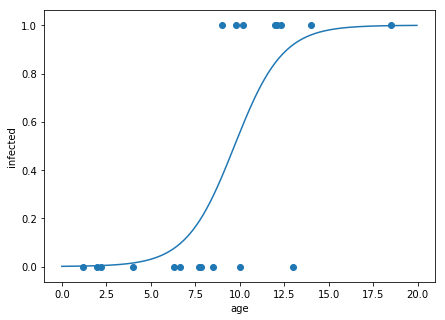

In [11]:
# We can visualize our model's sigmoid function
# to visualize the decision boundary, we  use the predicted probablity from our model
# our model will predict based on this curve
test_array = np.arange(0, 20, 0.05) # get a test array with x values from 0 to 20
test_prob = [] # the corresponding y values
# for each x value in the test array, we calculate what the probablity is given our model
for i in test_array:
    p_lost, p_win = logReg.predict_proba([[i,i]])[0]
    test_prob.append(p_win)
test_array = test_array.reshape(-1,1)
# plot the sigmoid function line
fig, ax = plt.subplots(figsize = (7, 5))
ax.plot(test_array, test_prob)
# plot the original data
ax.scatter(x['age'], y)
ax.set(xlabel='age', ylabel='infected')
plt.show()

In [13]:
# we can extract them out for 
coefs = logReg.coef_
interc = logReg.intercept_[0]
coefs

array([[0.47582593, 0.26302234]])

The sigmoid function is 

$$p(y) = \frac{e^{\beta_{0} + \beta{1}x_{1} + \beta{2}x_{2}}}{1 + e^{\beta_{0} + \beta{1}x_{1} + \beta{2}x_{2}}}$$

Convert this to $ y = ax + b$ form
$$ x_{2} = \frac{-\beta_{1}}{\beta_{2}} x_{1} + \frac{-\beta_{0}}{\beta_{2}}$$

In [14]:
# To plot the boundary between class 0 and class 1
# we are going to plot the formula above
intercept = -interc/coefs[:, 1] # -beta0 / beta2
slope = -coefs[:, 0]/coefs[:,1] # the coefficient of x1, -beta0 / beta1
print(intercept)
print(slope)

[27.24024447]
[-1.8090704]


In [15]:
df_0 = df[df['infected'] == 0]
df_1 = df[df['infected'] == 1]

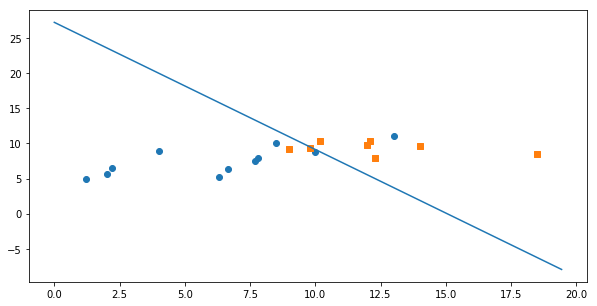

In [28]:
# in this plot, data points above the line are categorized as 1, those below the line are categorized as 0
# this line is our regression model's decision boundary
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_0['age'], df_0['sleep']) # class = 0 circle points 
ax.scatter(df_1['age'], df_1['sleep'], marker = 's') # class = 1 square points
x_min, x_max = ax.get_xlim()

ax.plot([0, x_max], [intercept, intercept+ slope*x_max])
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

y_pred = logReg.predict(x_test)
print(y_test)
print(y_pred)

10    1
1     0
8     0
18    1
14    0
Name: infected, dtype: int64
[0 0 0 1 0]


In [17]:
accuracy_score(y_test, y_pred)

0.8

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [1,0])

array([[1, 1],
       [0, 3]], dtype=int64)

In [19]:
logReg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

There is also `multi-class data`

## Softmax

Softmax:
- Converts multiple outputs to a percentage distribution between 0 and 1
- Percentage distribution: numbers all add up to 1 (100%)
- Outputs: 0.7 happy, 0.2 depressed, 0.1 unknown

Example: [1, 2, 3, 4, 1, 2, 3]

Result: [0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]